In [1]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, confusion_matrix

# Import models
from tensorflow import keras
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

keras.utils.set_random_seed(42)

2023-10-24 21:46:51.795686: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X,y = make_classification(n_samples=10000, n_features=16, n_informative=8,
                          n_redundant=8,
                          n_classes=2, n_clusters_per_class=2, class_sep=1.5, 
                          flip_y=0, weights=[0.98, 0.02], random_state=1)

In [3]:
X_scaled = MinMaxScaler().fit_transform(X) 
X_scaled = pd.DataFrame(X_scaled)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10000.0,0.430121,0.122499,0.0,0.346591,0.425318,0.509532,1.0
1,10000.0,0.434378,0.117336,0.0,0.354612,0.433981,0.512809,1.0
2,10000.0,0.387338,0.135986,0.0,0.291113,0.364877,0.469769,1.0
3,10000.0,0.520993,0.126764,0.0,0.436409,0.522875,0.605612,1.0
4,10000.0,0.506411,0.121150,0.0,0.427558,0.507506,0.585123,1.0
5,10000.0,0.512003,0.122318,0.0,0.433761,0.515100,0.593799,1.0
6,10000.0,0.451396,0.115404,0.0,0.374946,0.449715,0.527315,1.0
7,10000.0,0.485594,0.141318,0.0,0.383218,0.480776,0.585414,1.0
8,10000.0,0.555469,0.108848,0.0,0.482512,0.558011,0.629203,1.0
9,10000.0,0.491369,0.160678,0.0,0.367990,0.484273,0.612564,1.0


In [4]:
pca = PCA(n_components=8)
pca.fit(X_scaled)
print(np.sum(pca.explained_variance_ratio_))
pca_X = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_X)
pca_df['is_anomaly'] = y
pca_df = pca_df.sort_values(by=['is_anomaly'])

1.0000000000000002


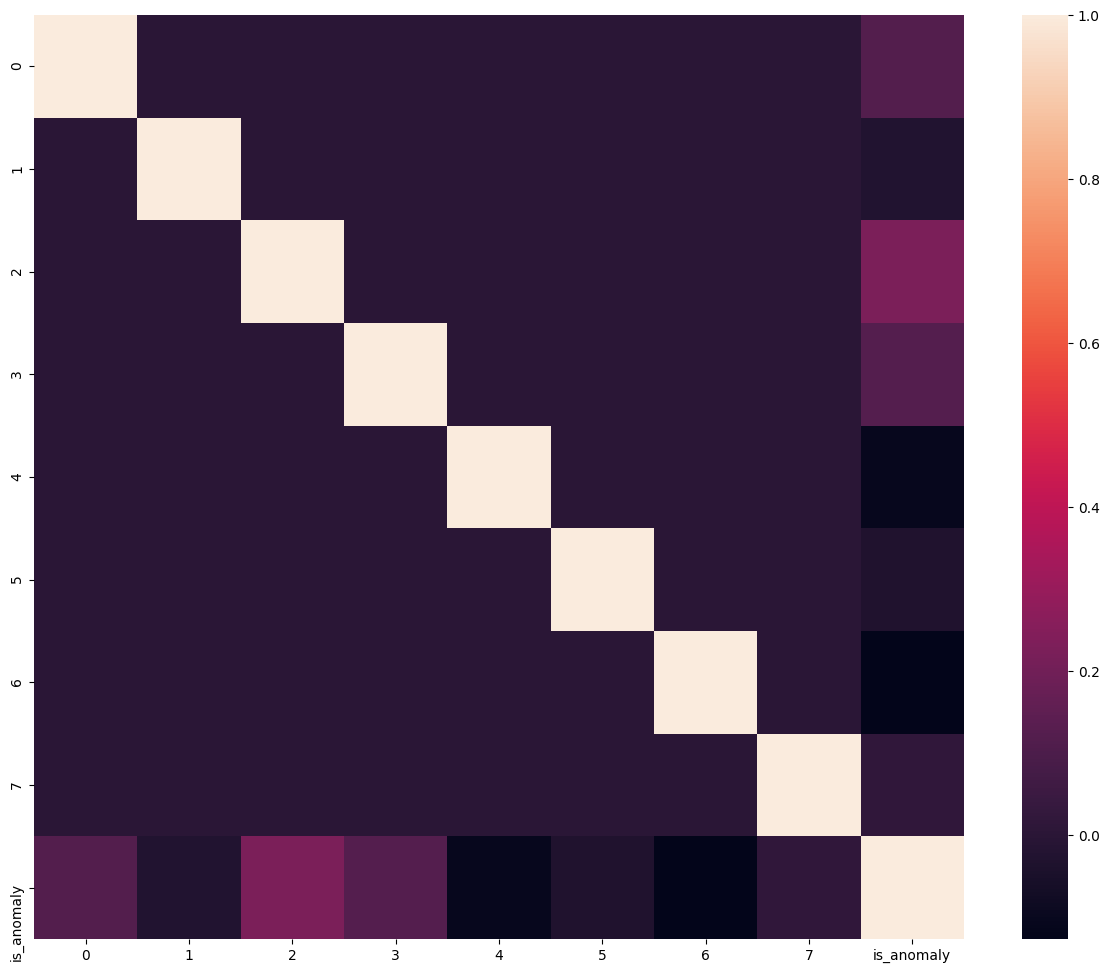

In [5]:
plot_df = pca_df.copy()

corr = plot_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

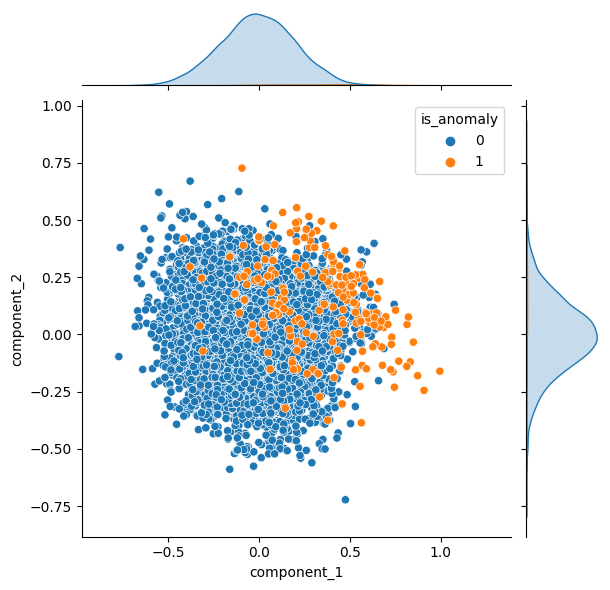

In [6]:
plot_df = plot_df.iloc[:,[2, 3, 8]]
plot_df.columns = ["component_1", "component_2", "is_anomaly"]

# Scatter plot of 2 features
sns.jointplot(data = plot_df, x="component_1", y="component_2", hue = "is_anomaly", kind='scatter')

In [7]:
all_data = pd.DataFrame(X_scaled)
all_data['is_anomaly'] = y

X = all_data.drop(['is_anomaly'], axis = 1)
y = all_data['is_anomaly']
display(all_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,is_anomaly
0,0.498522,0.405450,0.593196,0.398862,0.610847,0.335305,0.336101,0.666585,0.594751,0.612094,0.306240,0.386513,0.682242,0.480359,0.355690,0.560176,0
1,0.500037,0.615476,0.295402,0.516214,0.426629,0.476503,0.457754,0.519481,0.732102,0.401473,0.678898,0.380242,0.441761,0.381525,0.456062,0.462382,0
2,0.455807,0.443980,0.309410,0.555696,0.297617,0.593951,0.459896,0.412380,0.512727,0.350651,0.654124,0.521034,0.582703,0.555114,0.307488,0.719511,0
3,0.545626,0.362746,0.321652,0.436944,0.508876,0.527305,0.353262,0.280416,0.401881,0.295738,0.761519,0.684147,0.465362,0.642684,0.462767,0.521159,0
4,0.449691,0.481452,0.456081,0.533950,0.534650,0.409320,0.473306,0.683338,0.626529,0.483385,0.376915,0.367171,0.610105,0.422728,0.398180,0.545978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.215038,0.479135,0.237849,0.536370,0.278396,0.719026,0.589103,0.547353,0.411769,0.441859,0.335213,0.645169,0.658660,0.453590,0.571156,0.655781,0
9996,0.665548,0.315803,0.298438,0.469225,0.629475,0.627835,0.589491,0.296432,0.664862,0.293631,0.518988,0.633230,0.339289,0.628062,0.369854,0.459252,0
9997,0.415744,0.443128,0.326708,0.487127,0.544256,0.486642,0.362942,0.422759,0.520612,0.424015,0.534461,0.570785,0.526039,0.464504,0.581240,0.402436,0
9998,0.552640,0.282344,0.228789,0.581183,0.501073,0.691410,0.583762,0.251965,0.529364,0.212294,0.561388,0.687608,0.424874,0.650740,0.362316,0.563982,0


In [8]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

is_anomaly
0    7840
1     160
Name: count, dtype: int64
is_anomaly
0    1960
1      40
Name: count, dtype: int64


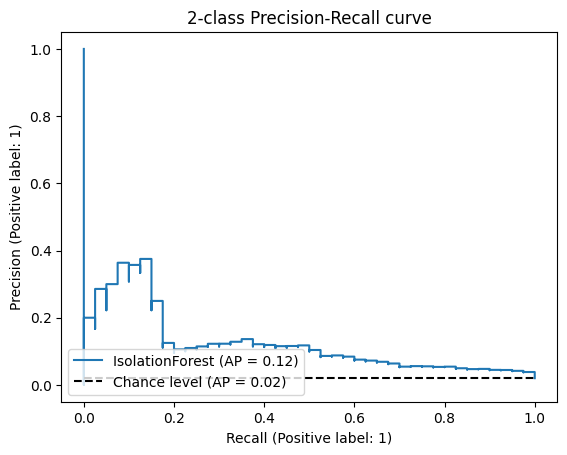

In [9]:
clf_IF = IsolationForest(random_state=42).fit(X_train)

y_train_pred = clf_IF.predict(X_train) * -1
y_train_pred[y_train_pred == -1] = 0
confusion_matrix(y_train, y_train_pred)

y_test_pred = clf_IF.predict(X_test) * -1
y_test_pred[y_test_pred == -1] = 0
confusion_matrix(y_test, y_test_pred)

y_score = clf_IF.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="IsolationForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[[1959    1]
 [  22   18]]


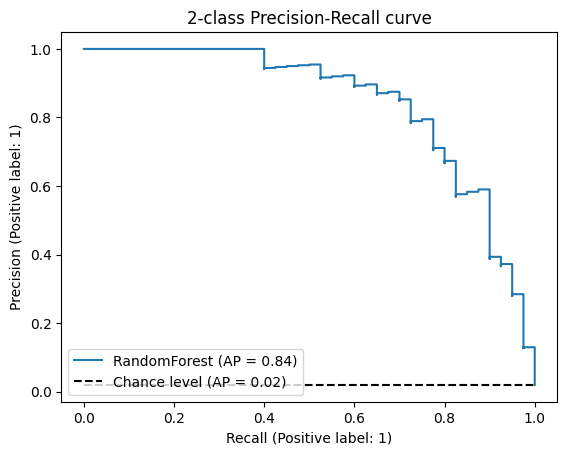

In [10]:
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42).fit(X_train, y_train)

y_test_pred = clf_RF.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

y_score = clf_RF.predict_proba(X_test)[:,1]

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="RandomForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [11]:
X_train_normals = X_train[y_train == 0]
X_train_normals.shape

(7840, 16)

In [12]:
n_features = 16

# model
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=16, activation='relu', input_shape=(n_features,)))
encoder.add(layers.Dropout(0.2))
encoder.add(layer=layers.Dense(units=8, activation='relu'))

decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=8, activation='relu', input_shape=(8,)))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=16, activation='relu'))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=n_features, activation='sigmoid'))

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=[metrics.mean_squared_error])

autoencoder.save_weights('init.h5')

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropou

Epoch 1/50
245/245 [==============================] - 1s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 2/50
245/245 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 3/50
245/245 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 4/50
245/245 [==============================] - 0s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 5/50
245/245 [==============================] - 0s 1ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 6/50
245/245 [==============================] - 0s 1ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 7/50
245/245 [========

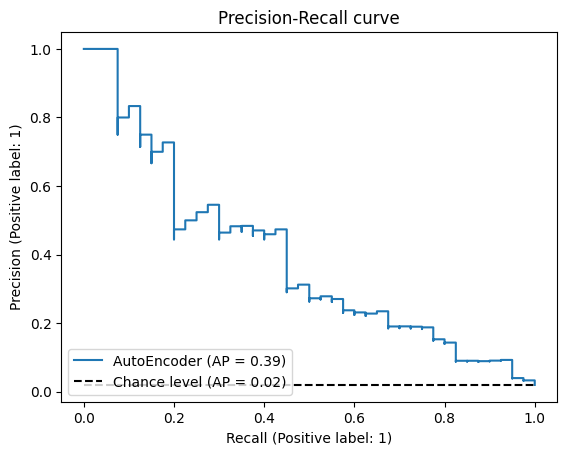

In [13]:
autoencoder.load_weights('init.h5')

es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

history = autoencoder.fit(x=X_train_normals, y=X_train_normals, epochs=50, 
                      batch_size=32, shuffle=True, verbose=1, 
                      validation_data=(X_train_normals, X_train_normals), 
                      callbacks=[es])

predicted_test = autoencoder.predict(x=X_test)

y_score = losses.mean_squared_error(predicted_test, X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="AutoEncoder", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/50
250/250 [========

246/246 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 3/50
246/246 [==============================] - 0s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 4/50
246/246 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 5/50
246/246 [==============================] - 0s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 6/50
246/246 [==============================] - 0s 2ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 7/50
246/246 [==============================] - 0s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8/50
246/246 [===================

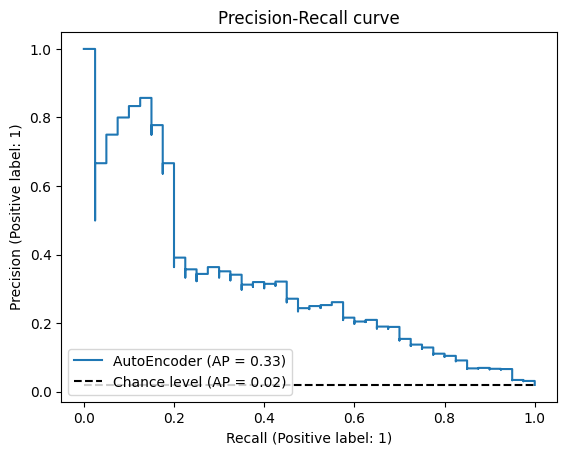

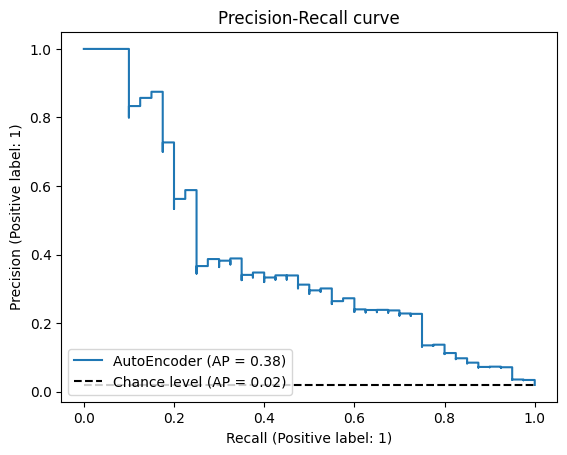

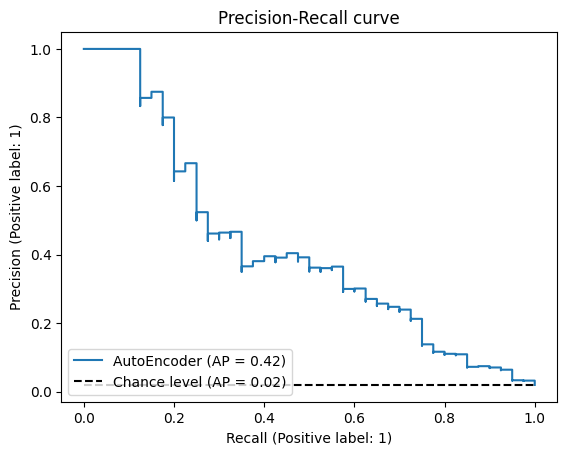

In [14]:
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

n_vec = [1000, 1000, 1000]

for i in range(3):
    
    autoencoder.load_weights('init.h5')

    history = autoencoder.fit(x=X_train, y=X_train, epochs=50, 
                          batch_size=32, shuffle=True, verbose=1, 
                          validation_data=(X_train, X_train), 
                          callbacks=[es])
    
    predicted_test = autoencoder.predict(x=X_test)

    y_score = losses.mean_squared_error(predicted_test, X_test)

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="AutoEncoder", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    predicted_train = autoencoder.predict(x=X_train)

    y_score = losses.mean_squared_error(predicted_train, X_train)
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

In [15]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

X_train_normals = X_train[y_train == 0]
print(X_train_normals.shape)

is_anomaly
0    7840
1     160
Name: count, dtype: int64
is_anomaly
0    1960
1      40
Name: count, dtype: int64
(7840, 16)


[[6922  918]
 [  78   82]]
82
7918
(8000, 16)
7918
(7918, 16)
(7918,)
[[6883  957]
 [  35   43]]
43
7875
(7918, 16)
7875
(7875, 16)
(7875,)
[[6845  995]
 [  30    5]]
5
7870
(7875, 16)
7870
(7870, 16)
(7870,)


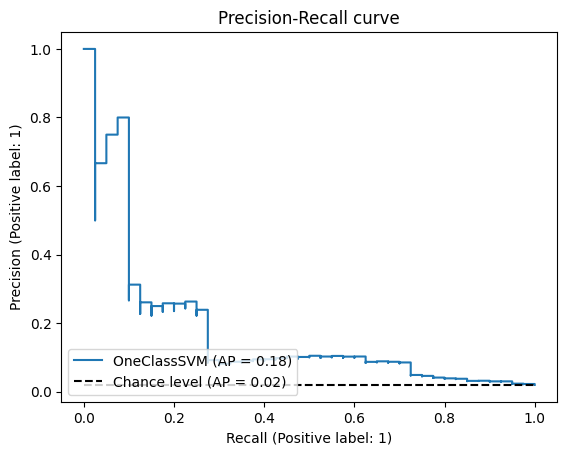

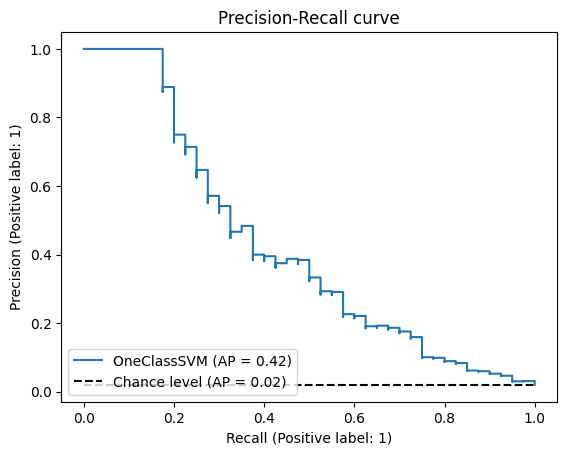

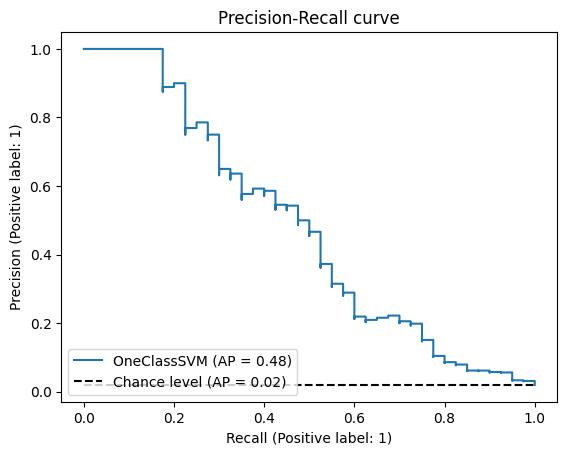

In [16]:
clf = OneClassSVM(gamma='scale', nu=0.02)

n_vec = [1000, 1000, 1000]

for i in range(3):

    clf.fit(X_train)
    
    y_score = clf.decision_function(X_test) * -1

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="OneClassSVM", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    y_score = clf.decision_function(X_train) * -1
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

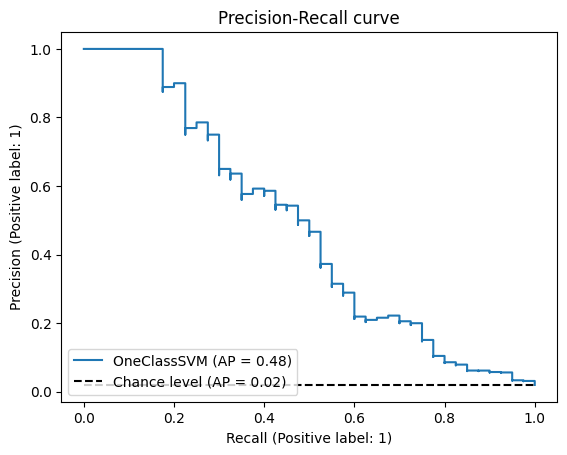

In [17]:
clf.fit(X_train_normals)
    
y_score = clf.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="OneClassSVM", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

In [18]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

X_train_normals = X_train[y_train == 0]
print(X_train_normals.shape)

is_anomaly
0    7840
1     160
Name: count, dtype: int64
is_anomaly
0    1960
1      40
Name: count, dtype: int64
(7840, 16)


[[6944  896]
 [  56  104]]
104
7896
(8000, 16)
7896
(7896, 16)
(7896,)
[[6851  989]
 [  45   11]]
11
7885
(7896, 16)
7885
(7885, 16)
(7885,)
[[6840 1000]
 [  45    0]]
0
7885
(7885, 16)
7885
(7885, 16)
(7885,)


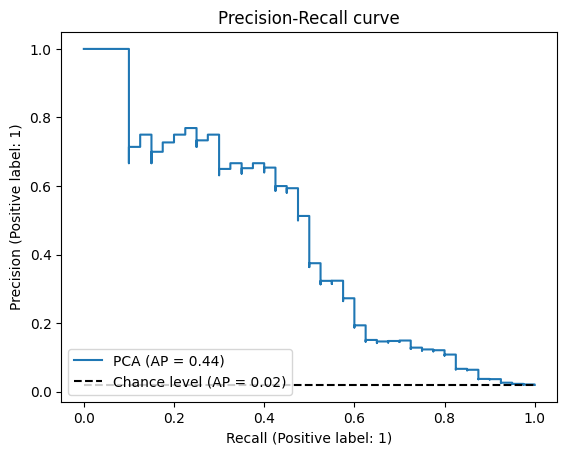

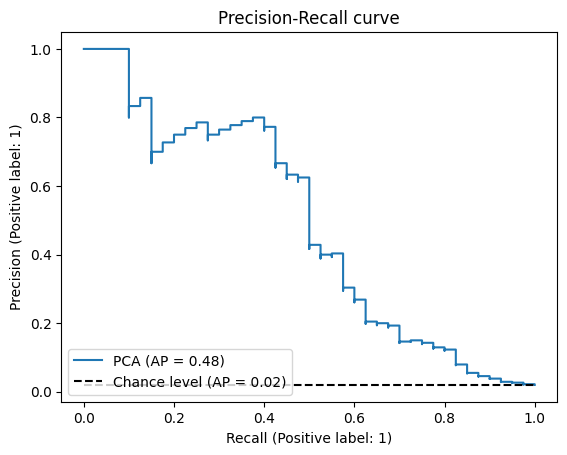

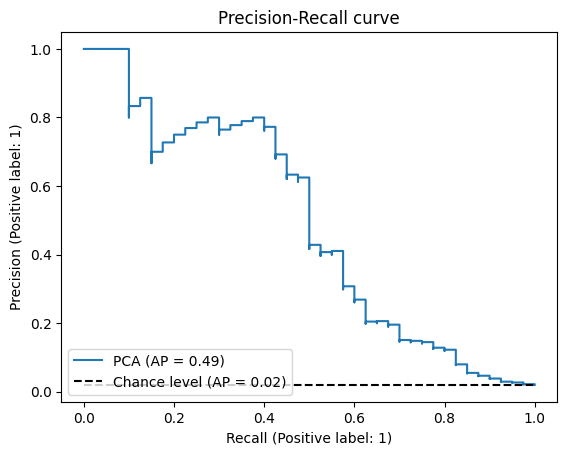

In [19]:
n_vec = [1000, 1000, 1000]

for i in range(3):
    
    pca = PCA(n_components=6, random_state=42)
    pca_train = pd.DataFrame(pca.fit_transform(X_train))
    pca_test = pd.DataFrame(pca.transform(X_test))
    
    predicted_test = pd.DataFrame(pca.inverse_transform(pca_test))

    y_score = losses.mean_squared_error(predicted_test, X_test)

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="PCA", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    predicted_train = pd.DataFrame(pca.inverse_transform(pca_train))

    y_score = losses.mean_squared_error(predicted_train, X_train)
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)

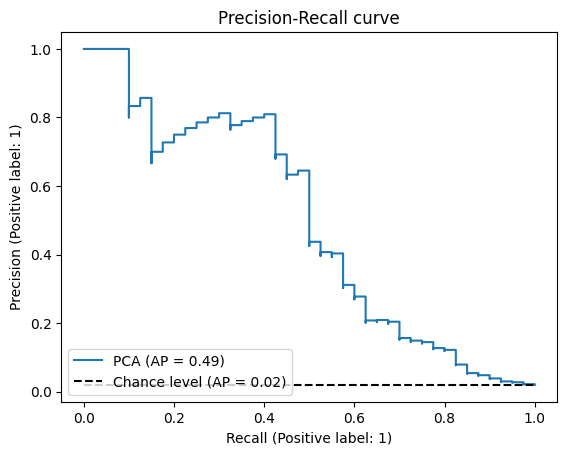

In [20]:
pca = PCA(n_components=6, random_state=42)
pca_train = pd.DataFrame(pca.fit_transform(X_train_normals))
pca_test = pd.DataFrame(pca.transform(X_test))

predicted_test = pd.DataFrame(pca.inverse_transform(pca_test))

y_score = losses.mean_squared_error(predicted_test, X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="PCA", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")